In [1]:
pip install zipfile

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [2]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
import pandas as pd #import pandas untuk baca data
import numpy as np #python scientific library(memnatu dalam urusan list)
# selective import modul-modul scikit learn
# (scikit learn untuk banyak modul)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
import os
fold_gunting = os.path.join('scissors')
fold_batu = os.path.join('rock')
fold_kertas = os.path.join('paper')

print('julah total gambar gunting:',len(os.listdir(fold_gunting)))
print('julah total gambar batu:',len(os.listdir(fold_batu)))
print('julah total gambar kertas:',len(os.listdir(fold_kertas)))

print("menampilkan nama file gambar gunting:")
file_gunting = os.listdir(fold_gunting)
print("gunting:",file_gunting[:5])

print("menampilkan nama file gambarvbatu:")
file_batu = os.listdir(fold_batu)
print("batu :",file_batu[:5])

print("menampilkan nama file gambar kertas")
file_kertas = os.listdir(fold_kertas)
print("kertas :",file_kertas[:5])      

julah total gambar gunting: 750
julah total gambar batu: 726
julah total gambar kertas: 712
menampilkan nama file gambar gunting:
gunting: ['0657zSfiTYzP2jrl.png', '0CSaM2vL2cWX6Cay.png', '0ePX1wuCc3et7leL.png', '0Flw60Z2MAWWKn6S.png', '0Ug54ifXRqqlZS2Z.png']
menampilkan nama file gambarvbatu:
batu : ['00nKV8oHuTGi20gq.png', '01dM3ewPIsnBICu1.png', '02vG75hQW9Vp4oTl.png', '0bioBZYFCXqJIulm.png', '0NDYNEoDui7o64gU.png']
menampilkan nama file gambar kertas
kertas : ['04l5I8TqdzF9WDMJ.png', '0a3UtNzl5Ll3sq8K.png', '0cb6cVL8pkfi4wF6.png', '0eqArS2GgsBeqgSn.png', '0Og76sl5CJhbxWWx.png']


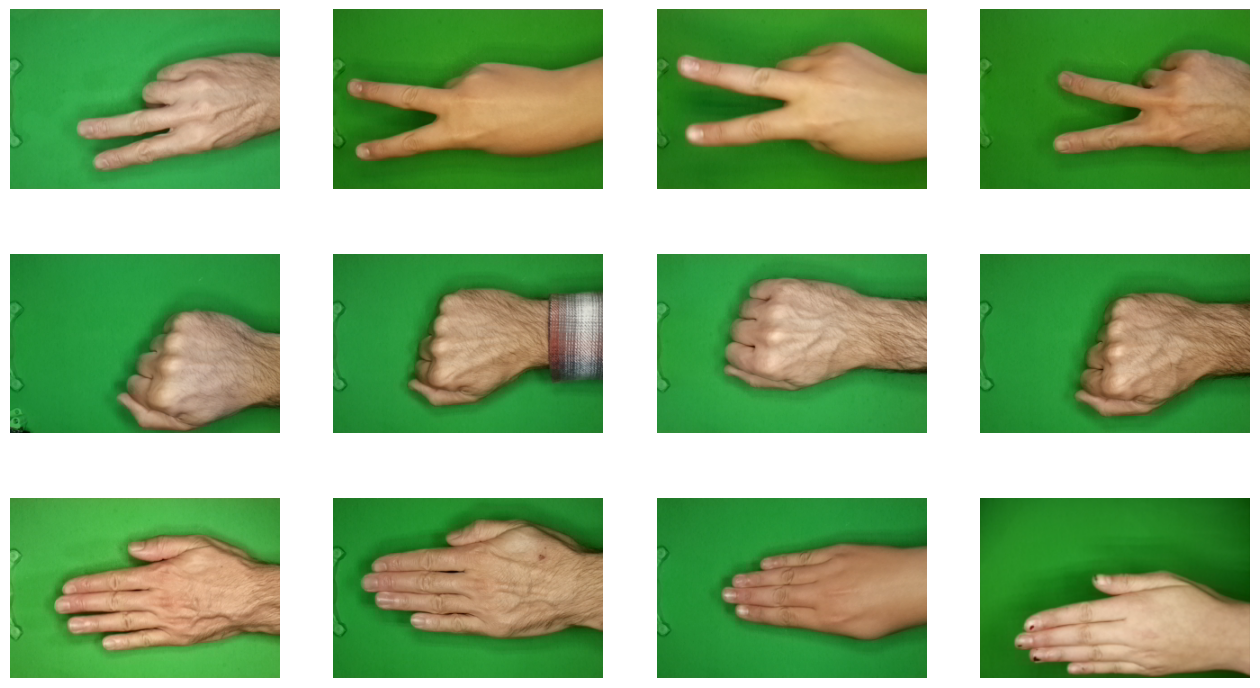

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                           #Jumlah baris tampilan gambar
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                              #Menampilkan gambar gunting
                      for fname in file_gunting[pic_index-4:pic_index]]
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                               #Menampilkan gambar batu
                      for fname in file_batu[pic_index-4:pic_index]]
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                             #Menampilkan gambar kertas
                      for fname in file_kertas[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [7]:
BASIS_DIR = "rps-cv-images"      #menyiapkan folder utama
training_datagen = ImageDataGenerator(                          #image generator
        rescale = 1./255,                                       #normalisasi data
    #augmentasi
        rotation_range=40,                                      #menerapkan skenario rotasi gamabr hingga 40 derajat
        width_shift_range=0.2,                                   #menerapkan skenario pelebaran gamabr hingga sebanyak 0.2 dari ukuran sebenanrya
        height_shift_range=0.2,                                 #menerapkan skenario pelebaran gamabr hingga sebanyak 0.2 dari ukuran sebenanrya
        shear_range=0.2,                                        #menerapkan skenario pemangkasan gamabr hingga 0.2 dari ukuran sebenarnya
        zoom_range=0.2,                                         #menerapkan skenario zoom gambar hingga sebesar 0.2 dari ukuran sebenrnya
        horizontal_flip=True,                                   #menerapkan skenario putar balik gammbar secara horizontal
        fill_mode='nearest',                                    #mengisi piksel yang kosong dengan nilai piksel terdekat
    #>>>>>>>memecah data train dan data valid<<<<<
    validation_split=0.2)

PEMBELAAN DATA MENGGUNAKAN IMAGE DATA GENERATOR BERDASARKAN FOLDER

In [8]:
train_generator = training_datagen.flow_from_directory(                             #generator data training
    BASIS_DIR,                                                                      #folder target untuk digenerasi
    target_size=(150,150),                                                          #mengubah resolusi seluruh gambar menjadi 150 x 150 piksel
    class_mode='categorical',                                                       #kelas data kategori untuk klasifikasi multivariable
    shuffle=True,                                
    subset='training')                                                              #untuk data training

validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=True,
    subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Membangun Model jaringan Saraf Tiruan

In [9]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
Model: "sequential_2"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 2)         258       
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        608       
                                                                 
 conv2d_4 (Conv2D)           (None, 68, 68, 2)         258       
                                                        

Melakukan kompilasi model

In [10]:
model.compile(loss='categorical_crossentropy',                   #loos function untuk klasifikasi kategori lebih dari 2
              optimizer='rmsprop',                               #fungsi optimizer(yang pernah dijarkan adalah 'adam')
              metrics=['accuracy'])                              #menampilkan akurasi model training

MELATIH MODEL JARINGAN SARAF TIRUAN

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2
)

Epoch 1/25
4/4 - 12s - loss: 1.0975 - accuracy: 0.3697 - val_loss: 1.1349 - val_accuracy: 0.3672 - 12s/epoch - 3s/step
Epoch 2/25
4/4 - 10s - loss: 1.2416 - accuracy: 0.3594 - val_loss: 1.1005 - val_accuracy: 0.3516 - 10s/epoch - 3s/step
Epoch 3/25
4/4 - 7s - loss: 1.1048 - accuracy: 0.2812 - val_loss: 1.0984 - val_accuracy: 0.3594 - 7s/epoch - 2s/step
Epoch 4/25
4/4 - 7s - loss: 1.1010 - accuracy: 0.2812 - val_loss: 1.1001 - val_accuracy: 0.3203 - 7s/epoch - 2s/step
Epoch 5/25
4/4 - 7s - loss: 1.1016 - accuracy: 0.2578 - val_loss: 1.0977 - val_accuracy: 0.3750 - 7s/epoch - 2s/step
Epoch 6/25
4/4 - 7s - loss: 1.1010 - accuracy: 0.3203 - val_loss: 1.0982 - val_accuracy: 0.3203 - 7s/epoch - 2s/step
Epoch 7/25
4/4 - 6s - loss: 1.0963 - accuracy: 0.3613 - val_loss: 1.0972 - val_accuracy: 0.3594 - 6s/epoch - 2s/step
Epoch 8/25
4/4 - 7s - loss: 1.0972 - accuracy: 0.3828 - val_loss: 1.0941 - val_accuracy: 0.3672 - 7s/epoch - 2s/step
Epoch 9/25
4/4 - 6s - loss: 1.1696 - accuracy: 0.3828 - val_

In [15]:
model.save("model.h5")

PLoting AKurasi training dan validasi

melihat pergerakan besaran nilai akurasi training dan validasi

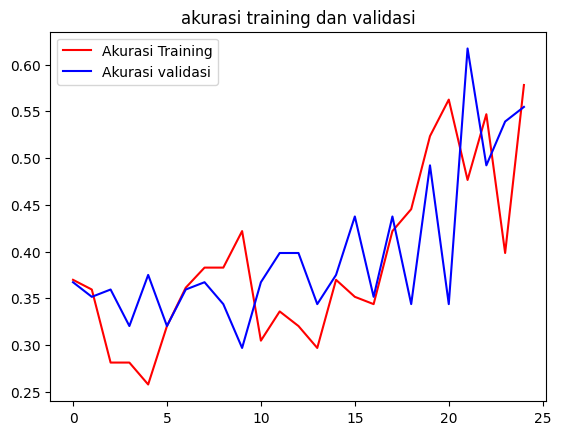

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b',label='Akurasi validasi')
plt.title('akurasi training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

1/1 [==============================] - 0s 406ms/step
Tangan Ini Menunjukkan bentuk BATU


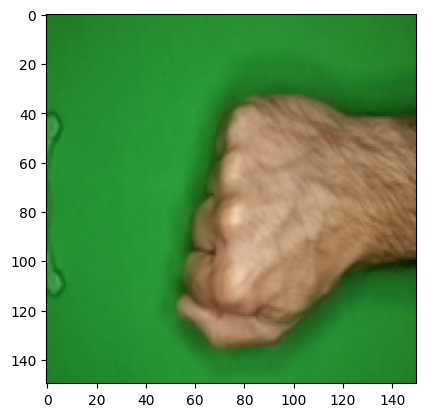

In [14]:
import numpy as np                                                                                                        #Mengimpor modul numpy
import matplotlib.pyplot as plt                                                                                         #Mengimpor modul import file
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

#Mengimpor modul keras_preprocessing untuk gambar

#mengubah path file pada gambar dengan lokasi file komputer
path = "rock/0bioBZYFCXqJIulm.png"

#mengubah ukuran gambar menjadi 150 x 150
img = Image.open(path) 
img = img.resize((150, 150))
#Mengubah ukuran gambar menjadi 150x150 piksel
imgplot = plt.imshow(img)              
#Mengubah gambar menjadi array
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
 #membuat array gambar
images = np.vstack([x])
#memprediksi kelas gamabr
classes = model.predict(images, batch_size=10)
if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                                                         #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')                                                                           #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                                                        #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
else:
    print('Tidak Diketahui')  

NameError: name 'features' is not defined